### **Artificial Neural Network MNIST**

##### 2020710058 Applied Data Science Doo-yeonog, Lee

In [1]:
from keras import layers, models

In [2]:
def ANN_models_func(Nin, Nh, Nout):
    x = layers.Input(shape=(Nin,))
    h = layers.Activation('relu')(layers.Dense(Nh)(x))
    y = layers.Activation('softmax')(layers.Dense(Nout)(h))
    model = models.Model(x, y)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [3]:
def ANN_seq_func(Nin, Nh, Nout):
    model = models.Sequential()
    model.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
    model.add(layers.Dense(Nout, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam', metrics=['accuracy'])
    return model

In [4]:
class ANN_models_class(models.Model):
    def __init__(self, Nin, Nh, Nout):
        # Prepare network layers and activate functions
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')
        softmax = layers.Activation('softmax')

        # Connect network elements
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = softmax(output(h))

        super().__init__(x, y)
        self.compile(loss='categorical_crossentropy',
                     optimizer='adam', metrics=['accuracy'])

In [5]:
class ANN_seq_class(models.Sequential):
    def __init__(self, Nin, Nh, Nout):
        super().__init__()
        self.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy',
                     optimizer='adam', metrics=['accuracy'])

In [6]:
##############################################
# Data
##############################################
import numpy as np
from keras import datasets  # mnist
from keras.utils import np_utils  # to_categorical

def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)

    L, W, H = X_train.shape
    X_train = X_train.reshape(-1, W * H)
    X_test = X_test.reshape(-1, W * H)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)

In [7]:
##############################################
# Plotting
##############################################
import matplotlib.pyplot as plt


def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()


11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/15
480/480 [==============================] - 2s 4ms/step - loss: 0.6972 - accuracy: 0.8038 - val_loss: 0.2103 - val_accuracy: 0.9413
Epoch 2/15
480/480 [==============================] - 1s 3ms/step - loss: 0.1941 - accuracy: 0.9461 - val_loss: 0.1538 - val_accuracy: 0.9578
Epoch 3/15
480/480 [==============================] - 1s 3ms/step - loss: 0.1377 - accuracy: 0.9591 - val_loss: 0.1330 - val_accuracy: 0.9622
Epoch 4/15
480/480 [==============================] - 1s 3ms/step - loss: 0.1098 - accuracy: 0.9684 - val_loss: 0.1235 - val_accuracy: 0.9638
Epoch 5/15
480/480 [==============================] - 1s 3ms/step - loss: 0.0854 - accuracy: 0.9751 - val_loss: 0.1103 - val_accuracy: 0.9691
Epoch 6/15
480/480 [==============================] - 1s 3ms/step - loss: 0.0704 - accuracy: 0.9793 - val_loss: 0.1029 - val_accuracy: 0.9698
Epoch 7/15
480/480 [==============================] - 1s 3ms/step - loss: 0.0589 - 

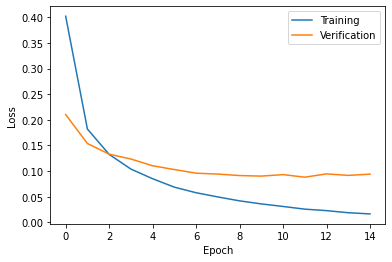

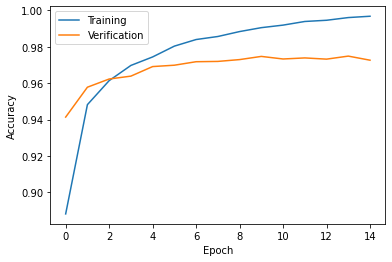

In [8]:
##############################################
# Main
##############################################
def main():
    Nin = 784
    Nh = 100
    number_of_class = 10
    Nout = number_of_class

    # model = ANN_models_func(Nin, Nh, Nout)
    # model = ANN_models_class(Nin, Nh, Nout)
    model = ANN_seq_class(Nin, Nh, Nout)
    (X_train, Y_train), (X_test, Y_test) = Data_func()

    ##############################################
    # Training
    ##############################################
    history = model.fit(X_train, Y_train, epochs=15, batch_size=100, validation_split=0.2)
    performace_test = model.evaluate(X_test, Y_test, batch_size=100)
    print('Test Loss and Accuracy ->', performace_test)

    plot_loss(history)
    plt.show()
    plot_acc(history)
    plt.show()


# Run code
if __name__ == '__main__':
    main()
